# Method of Relaxation
* Author James Shaddix

### Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from numba import jit

In [2]:
class Axis(object):
    
    def __init__(self, minimum, maximum, bc_min, bc_max, size, num_cells=False):
        """
        :params
        :minimum = minimum axis value
        :maximum = maximum axis value
        :bc_min = boundary condition at the minimum
        :bc_max = boundary condition at the maximum
        :size = step-size between the maximum and minimum values
        :num_cells = if True: the size parameter will be interpreted as the number 
                     of cells along an axis.
        """
        self.min = minimum
        self.max = maximum
        self.bc_min = bc_min
        self.bc_max = bc_max
        
        if num_cells:
            self.step_size = size
        else:
            self.step_size = round((maximum - minimum + 1) / size)
            
        self.value = np.linspace(minimum, maximum, self.step_size)
        
    def __str__(self):
        string = str(["{:.2f}".format(v) for v in self.value])
        return string
    
    def __repr__(self):
        return self.__str__()

In [3]:
class Grid(object):
    
    def __init__(self, x_ax, y_ax):
        """
        :params
        :x_ax = axis object
        :y_ax = axis object
        """
        
        # Create Grid
        self.X_cor, self.Y_cor = np.meshgrid(x_ax.value, y_ax.value)
        self.Z_cor = np.zeros_like(self.X_cor)
        
        # Ease axis to data
        self.shape = self.Z_cor.shape
        
        # Init Boundary Conditions
        for cor, ax in zip((self.X_cor, self.Y_cor),(x_ax,y_ax)):
            self.Z_cor[cor == ax.min] = ax.bc_min
            self.Z_cor[cor == ax.max] = ax.bc_max
        
    def __str__(self):
        v_to_str = np.vectorize(lambda x: "{:.2f}".format(x))
        return str(v_to_str(self.Z_cor))
        
    def __repr__(self):
        return self.__str__()
        
    def plot(self):
        
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        # Plot the surface.
        surf = ax.plot_surface(self.X_cor, self.Y_cor, self.Z_cor, 
                               antialiased=False, # False: implies cells are not shown
                               cmap=cm.rainbow)

        # Customize the z axis.
        ax.zaxis.set_major_locator(LinearLocator(5)) # number of pointes on axis
        ax.yaxis.set_major_locator(LinearLocator(5)) # number of pointes on axis
        ax.xaxis.set_major_locator(LinearLocator(5)) # number of pointes on axis
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.01f')) # format axis values
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.01f')) # format axis values
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f')) # format axis values

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Z axis (Potential)')
        plt.show()
        

### Method of Relaxation

In [34]:
@jit
def relax(matrix, iterations):
    rows, cols = [i-1 for i in matrix.shape]
    for count in range(iterations):
        for i in range(1,rows):
            for j in range(1,cols):
                matrix[i][j] = (matrix[i-1][j] + matrix[i][j-1]  + \
                                matrix[i+1][j] + matrix[i][j+1]) / 4

### Running the Algorithm

In [35]:
x_axis = Axis(minimum=1,  maximum=10, bc_min=1, bc_max=2, size=50,num_cells=True)
y_axis = Axis(minimum=-2, maximum=2,  bc_min=3, bc_max=4, size=100,num_cells=True)
grid = Grid(x_axis,y_axis)

In [43]:
import time 
start = time.time()
relax(grid.Z_cor, 100000)
finish = time.time() - start

In [44]:
finish

2.6436097621917725

In [38]:
9/0.03

300.0

### Plots

### Inline Plot

In [7]:
%matplotlib qt
grid.plot()

### Plotly Plot

In [11]:
# Taken from the topological plot example
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Surface(
        #z=z_data.as_matrix()
        z = grid.Z_cor,
        y = grid.Y_cor,
        x = grid.X_cor,
        colorscale='RdBu'
    )
]
layout = go.Layout(
    title='Potential (Method: Relaxation)',
    autosize=False,
    width=800,
    height=800,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py

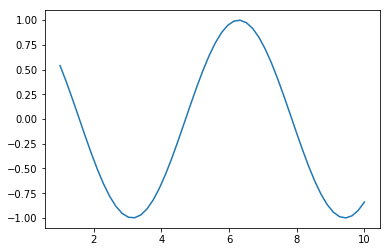

In [3]:
x = np.linspace(1,10)
y = np.cos(x)

plt.plot(x,y);

In [4]:
data = [go.Scatter(x=x,y=y)]
fig = go.Figure(data=data)
py.iplot(fig)

/Users/jamesshaddix/anaconda3/envs/data-sci/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [25]:
trace = go.Scatter (
    x = [ 1, 2, 3 ], 
    y = [ 1, 2, 3 ] , 
    marker = dict (\
        color = [ 'red', 'blue' , 'green' ],
        size = [ 30, 80, 200 ] ), 
        mode = 'markers' )

py.iplot ( [ trace ] )

/Users/jamesshaddix/anaconda3/envs/data-sci/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [32]:
x = ["jim", "gavin", "antony"]
y = [10,20,30]

In [35]:
trace = go.Bar(x=x, y=y)
py.iplot([trace])

In [45]:
x = np.linspace(1,30, 1000)
y1 = x*np.sin(x) + x
y2 = x*np.cos(x) + x

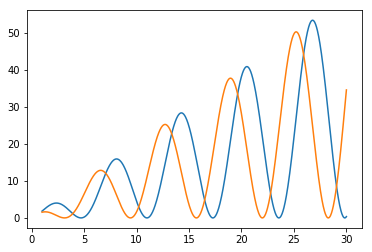

In [47]:
plt.plot(x,y1,x,y2);

In [48]:
traces = [
          go.Scatter(x=x, y=y1), 
          go.Scatter(x=x, y=y2)
         ]
py.iplot(traces)